# Please read [this](https://github.com/stardist/stardist/tree/conic-2022/examples/conic-2022/README.md) first

This notebook demonstrates model prediction for the 2022 [*Colon Nuclei Identification and Counting (CoNIC)* challenge](https://conic-challenge.grand-challenge.org).

(If you haven't done it already, run the [training notebook](train.ipynb) first to create a model.)

Please see [our paper](https://arxiv.org/abs/2203.02284) for more details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from imageio import imread

from conic import predict
from stardist.models import StarDist2D
from stardist.plot import random_label_cmap, render_label

np.random.seed(42)
cmap_random = random_label_cmap()

2023-02-20 11:17:24.732194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 11:17:24.808449: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-20 11:17:24.808465: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 11:17:25.185541: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Model and test image

In [2]:
model = StarDist2D(None, name='conic', basedir='./models')

2023-02-20 11:17:29.199905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 11:17:29.200575: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/uwe/sw/miniconda3/envs/conic/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-20 11:17:29.200635: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/uwe/sw/miniconda3/envs/conic/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-20 11:17:29.200688: W tensorflow/compiler/xla/stream_executor/platform/default/ds

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.497882, nms_thresh=0.3.


In [3]:
# load arbitrary image from dataset to demonstrate prediction
X = np.load('./data/images.npy')
x = X[10]

## Prediction

In [6]:
u, count = predict(model, x,
    normalize            = True,
    test_time_augment    = True,
    tta_merge            = dict(prob=np.median, dist=np.mean, prob_class=np.mean),
    refine_shapes        = dict(),
)

1/1 [==============================] - 0s 77ms/step


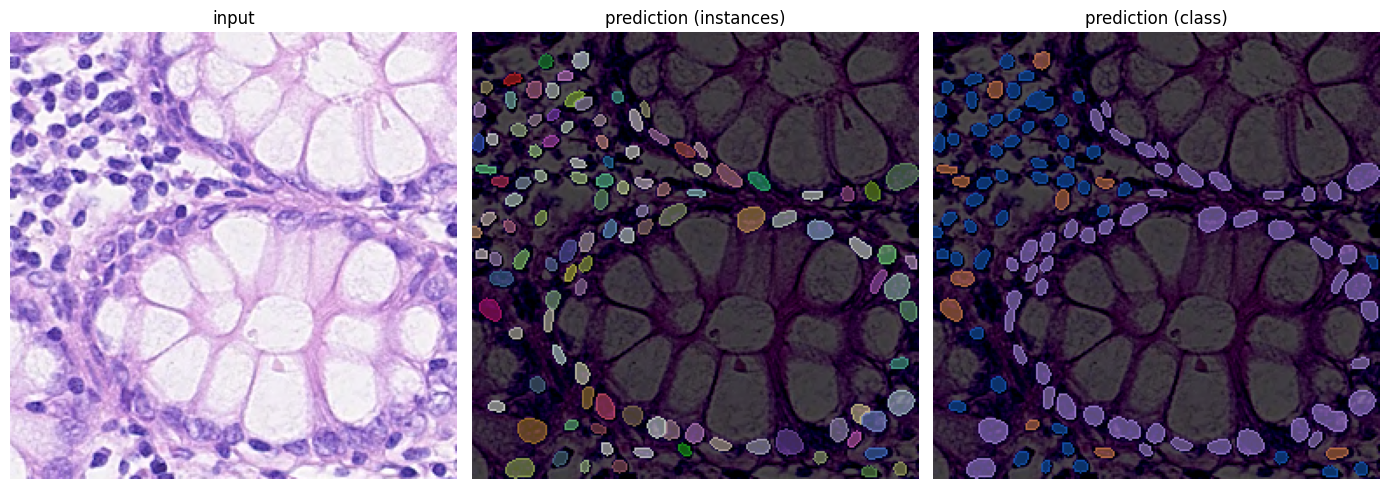

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(14,5))

for ax, title, img in zip(
    axs.ravel(),
    ('input', 'prediction (instances)', 'prediction (class)'),
    (x,
     render_label(u[...,0], img=tf.image.adjust_brightness(x,-0.7)/255, normalize_img=False),
     render_label(u[...,1], img=tf.image.adjust_brightness(x,-0.7)/255, normalize_img=False, cmap=cmap_random),
    )
):
    ax.imshow(img, interpolation=None)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout();